# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
# Get current date
d = datetime.datetime.today()
today = d.strftime('%d-%m-%Y')
# Import API key
from api_keys import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

881


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
dfCities = pd.DataFrame({'City':cities})
dfCities['Cloudiness']= ""
dfCities['Country']= ""
dfCities['Date']= ""
dfCities['Humidity']= ""
dfCities['Lat']= ""
dfCities['Lng']= ""
dfCities['Max Temp']= ""
dfCities['Wind Speed']= ""
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
print('Beginning Data Retrieval')
print('-----------------------------')
# use iterrows to iterate through pandas dataframe
for index, row in dfCities.iterrows():          
    curCity = row['City']
    fullQuery = query_url + curCity
    try:
        response = requests.get(fullQuery).json()
        row['Cloudiness']= response['clouds']['all']
        row['Country']= response['sys']['country']
        row['Date']= response['dt']
        row['Humidity']= response['main']['humidity']
        row['Lat']= response['coord']['lat']
        row['Lng']= response['coord']['lon']
        row['Max Temp']= response['main']['temp_max']
        row['Wind Speed']= response['wind']['speed']
        print(f'Processing Record {index} | {curCity}')
    except (KeyError, IndexError):
        print(f"City ({curCity}) not found. Skipping...")

        
    

Beginning Data Retrieval
-----------------------------
Processing Record 0 | bethel
City (saleaula) not found. Skipping...
Processing Record 2 | busselton
Processing Record 3 | lavrentiya
Processing Record 4 | sulat
Processing Record 5 | batagay-alyta
Processing Record 6 | hilo
Processing Record 7 | moron
Processing Record 8 | ribeira grande
Processing Record 9 | jamestown
Processing Record 10 | hobart
Processing Record 11 | quelimane
Processing Record 12 | naryan-mar
Processing Record 13 | punta arenas
Processing Record 14 | marawi
Processing Record 15 | tshikapa
Processing Record 16 | muisne
Processing Record 17 | albany
City (taolanaro) not found. Skipping...
Processing Record 19 | dikson
Processing Record 20 | mahebourg
Processing Record 21 | samarai
Processing Record 22 | bocas del toro
Processing Record 23 | celestun
Processing Record 24 | ilulissat
Processing Record 25 | ushuaia
Processing Record 26 | joshimath
Processing Record 27 | san patricio
Processing Record 28 | longyearb

Processing Record 242 | igarka
City (samusu) not found. Skipping...
Processing Record 244 | narsaq
Processing Record 245 | tutoia
Processing Record 246 | carutapera
Processing Record 247 | kavieng
Processing Record 248 | aklavik
Processing Record 249 | paralimni
City (barentsburg) not found. Skipping...
Processing Record 251 | lyndon
Processing Record 252 | xai-xai
Processing Record 253 | san antonio
Processing Record 254 | havixbeck
Processing Record 255 | dingle
City (belushya guba) not found. Skipping...
Processing Record 257 | puerto quijarro
Processing Record 258 | talcahuano
Processing Record 259 | nikolskoye
Processing Record 260 | ilo
Processing Record 261 | yulara
Processing Record 262 | nome
Processing Record 263 | oktyabrskiy
City (candawaga) not found. Skipping...
Processing Record 265 | indiana
City (krasnoselkup) not found. Skipping...
Processing Record 267 | havelock
Processing Record 268 | callaway
Processing Record 269 | superior
Processing Record 270 | alihe
Processin

Processing Record 487 | zhuhai
Processing Record 488 | dhidhdhoo
Processing Record 489 | wattegama
Processing Record 490 | mzimba
Processing Record 491 | sungaipenuh
Processing Record 492 | muyinga
Processing Record 493 | gushikawa
Processing Record 494 | kenai
Processing Record 495 | salym
Processing Record 496 | kalmunai
Processing Record 497 | luderitz
Processing Record 498 | lahij
Processing Record 499 | lebedinyy
Processing Record 500 | manakara
Processing Record 501 | sabang
Processing Record 502 | tuy hoa
Processing Record 503 | ljungby
Processing Record 504 | yaguajay
Processing Record 505 | lermontovka
Processing Record 506 | bloomingdale
Processing Record 507 | qena
City (asau) not found. Skipping...
City (mrirt) not found. Skipping...
Processing Record 510 | priverno
Processing Record 511 | williams lake
Processing Record 512 | georgiyevskoye
Processing Record 513 | dubbo
Processing Record 514 | alto longa
Processing Record 515 | saldanha
Processing Record 516 | caravelas
Pr

Processing Record 730 | houma
Processing Record 731 | feltre
Processing Record 732 | coihueco
Processing Record 733 | alghero
Processing Record 734 | puyang
Processing Record 735 | navolato
Processing Record 736 | pemberton
Processing Record 737 | kajaani
Processing Record 738 | hervey bay
Processing Record 739 | ayan
Processing Record 740 | cairo
Processing Record 741 | jacksonville
Processing Record 742 | yaan
Processing Record 743 | mana
Processing Record 744 | ginir
Processing Record 745 | mossendjo
Processing Record 746 | yar-sale
Processing Record 747 | chama
Processing Record 748 | darnah
Processing Record 749 | moree
Processing Record 750 | mamlyutka
Processing Record 751 | saint-augustin
Processing Record 752 | salalah
Processing Record 753 | denpasar
Processing Record 754 | jaru
Processing Record 755 | dabhol
Processing Record 756 | quimperle
Processing Record 757 | oxchuc
Processing Record 758 | tres picos
Processing Record 759 | wainwright
Processing Record 760 | novopokrov

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
dfCities.to_csv('city-weather-data.csv', encoding='utf-8', index=False)

In [5]:
dfCities.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bethel,75,US,1551657360,69,60.79,-161.76,35.6,10.29
1,saleaula,,,,,,,,
2,busselton,0,AU,1551657800,38,-33.64,115.35,70,18.39
3,lavrentiya,88,RU,1551657897,95,65.58,-170.99,28.43,34.61
4,sulat,92,PH,1551658410,99,11.81,125.45,77.71,7.76


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

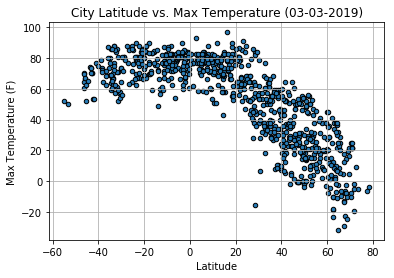

In [6]:
dfCities['Lat'] = pd.to_numeric(dfCities['Lat'])
dfCities['Max Temp'] = pd.to_numeric(dfCities['Max Temp'])
dfCities.plot.scatter(x='Lat',y='Max Temp',c='#287cb7', edgecolors='black')
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel(f"Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
# Save Figure
plt.savefig("Latitude-vs-Temperature-Plot.png")
# Show plot
plt.show()

#### Latitude vs. Humidity Plot

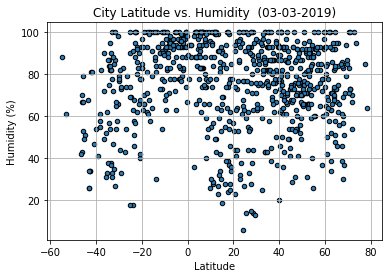

In [7]:
dfCities['Humidity'] = pd.to_numeric(dfCities['Humidity'])
dfCities.plot.scatter(x='Lat',y='Humidity',c='#287cb7', edgecolors='black')
plt.title(f"City Latitude vs. Humidity  ({today})")
plt.xlabel(f"Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
# Save Figure
plt.savefig("Latitude-vs-Humidity-Plot.png")
# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

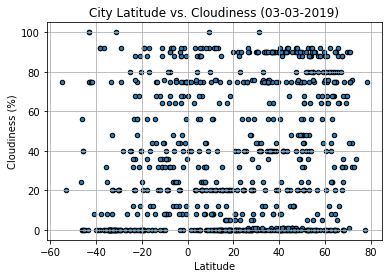

In [8]:
dfCities['Cloudiness'] = pd.to_numeric(dfCities['Cloudiness'])
dfCities.plot.scatter(x='Lat',y='Cloudiness',c='#287cb7', edgecolors='black')
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel(f"Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
# Save Figure
plt.savefig("Latitude-vs-Cloudiness-Plot.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

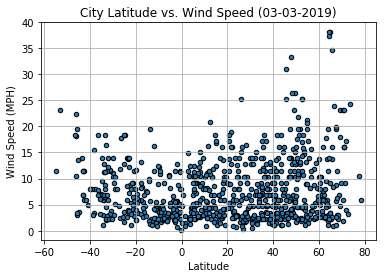

In [9]:
dfCities['Wind Speed'] = pd.to_numeric(dfCities['Wind Speed'])
dfCities.plot.scatter(x='Lat',y='Wind Speed',c='#287cb7', edgecolors='black')
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel(f"Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid()
# Save Figure
plt.savefig("Latitude-vs-Wind-Speed-Plot.png")
# Show plot
plt.show()

In [14]:
print('Trend Observations:')
print('----------------------------------------')
print('> Cloudiness data appears to be clearly observational and artificial. The dots on the resulting scatterplot do not look random as the percentage values match others frequently throughout the collected data set. ')
print('> The max temperature vs latitude plot clearly suggests that it is summer south of the equator. The temperature plots display a obvious curve heading towards lower temperatures as the latitudes move north.' )
print('> The comparison of the wind speed and the humidity plots suggest that there maybe a correlation between high humidity and low wind speeds. The bulk of wind speeds are under 15MPH while a strong percentage of the humidity levels is above 60%.')

Trend Observations:
----------------------------------------
> Cloudiness data appears to be clearly observational and artificial. The dots on the resulting scatterplot do not look random as the percentage values match others frequently throughout the collected data set. 
> The max temperature vs latitude plot clearly suggests that it is summer south of the equator. The temperature plots display a obvious curve heading towards lower temperatures as the latitudes move north.
> The comparison of the wind speed and the humidity plots suggest that there maybe a correlation between high humidity and low wind speeds. The bulk of wind speeds are under 15MPH while a strong percentage of the humidity levels is above 60%.
